Working with Data

install pandas-gbq

pip install pandas-gbq

In [1]:
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_gbq
import matplotlib.pyplot as plt

#%matplotlib inline

#para definir la ruta de los directorios
from pathlib import Path
current_dir = Path('.').resolve()
project_dir = Path(current_dir).parent

In [2]:
query = """
    SELECT
    *
    FROM
        `bigquery-public-data.chicago_taxi_trips.taxi_trips`
    LIMIT 1000
"""
df = pd.read_gbq(query)
df.head()

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,1635cc78e071c55379ba87d3d275a4f21333d213,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 11:30:00+00:00,2016-09-22 11:45:00+00:00,600,0.8,<NA>,<NA>,<NA>,<NA>,...,0.0,9.25,Credit Card,Chicago Independents,NaN,NaN,None,NaN,NaN,None
1,1e3168900f8090e1bab555b15210f6ad701af327,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 11:45:00+00:00,2016-09-22 12:00:00+00:00,960,7.6,<NA>,<NA>,<NA>,<NA>,...,0.0,21.50,Cash,Chicago Independents,NaN,NaN,None,NaN,NaN,None
2,c620405438b7bfcc6378f885f6aa56d1b8be9369,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 15:00:00+00:00,2016-09-22 15:45:00+00:00,3000,13.2,<NA>,<NA>,<NA>,<NA>,...,0.0,37.00,Cash,Chicago Independents,NaN,NaN,None,NaN,NaN,None
3,c8b56b9c599580efc1e4ffe36ac36cfb7ea85cbd,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 17:15:00+00:00,2016-09-22 17:45:00+00:00,2220,12.2,<NA>,<NA>,<NA>,<NA>,...,4.5,46.58,Credit Card,Chicago Independents,NaN,NaN,None,NaN,NaN,None
4,c876619a0a2869039533144d7105948e9cfc1951,1158f25979ad78fd3dafc867a540ad761b65922c312e61...,2016-09-19 21:00:00+00:00,2016-09-19 21:30:00+00:00,1560,15.6,<NA>,<NA>,<NA>,<NA>,...,4.0,52.40,Credit Card,Sun Taxi,NaN,NaN,None,NaN,NaN,None


EXPLORACION DE DATOS
DATOS UNIDIMENCIONALES
solo variables numericas, columnas numericas

In [3]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_df = df.select_dtypes(include=numerics)
num_df.head()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,600,0.8,<NA>,<NA>,<NA>,<NA>,6.75,2.00,0.0,0.0,9.25,NaN,NaN,NaN,NaN
1,960,7.6,<NA>,<NA>,<NA>,<NA>,21.50,0.00,0.0,0.0,21.50,NaN,NaN,NaN,NaN
2,3000,13.2,<NA>,<NA>,<NA>,<NA>,37.00,0.00,0.0,0.0,37.00,NaN,NaN,NaN,NaN
3,2220,12.2,<NA>,<NA>,<NA>,<NA>,35.50,6.08,0.0,4.5,46.58,NaN,NaN,NaN,NaN
4,1560,15.6,<NA>,<NA>,<NA>,<NA>,39.25,8.65,0.0,4.0,52.40,NaN,NaN,NaN,NaN


In [4]:
num_df.describe()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,1000.000000,1000.000000,0,0,0,0,1000.000000,1000.000000,907.0,1000.000000,1000.000000,0.0,0.0,0.0,0.0
mean,827.440000,6.726440,<NA>,<NA>,<NA>,<NA>,13.628910,1.578080,0.0,0.970000,16.376990,NaN,NaN,NaN,NaN
std,803.937998,18.950691,<NA>,<NA>,<NA>,<NA>,13.689976,2.675334,0.0,3.560024,16.965577,NaN,NaN,NaN,NaN
min,0.000000,0.000000,<NA>,<NA>,<NA>,<NA>,0.010000,0.000000,0.0,0.000000,0.010000,NaN,NaN,NaN,NaN
25%,347.500000,1.000000,<NA>,<NA>,<NA>,<NA>,6.000000,0.000000,0.0,0.000000,7.250000,NaN,NaN,NaN,NaN
50%,600.000000,1.900000,<NA>,<NA>,<NA>,<NA>,8.500000,0.000000,0.0,0.000000,10.250000,NaN,NaN,NaN,NaN
75%,960.000000,5.725000,<NA>,<NA>,<NA>,<NA>,14.762500,2.000000,0.0,1.000000,17.500000,NaN,NaN,NaN,NaN
max,6240.000000,195.900000,<NA>,<NA>,<NA>,<NA>,145.000000,20.000000,0.0,72.000000,217.000000,NaN,NaN,NaN,NaN


Variables unidemencionales
histograma
box plot

<AxesSubplot:>

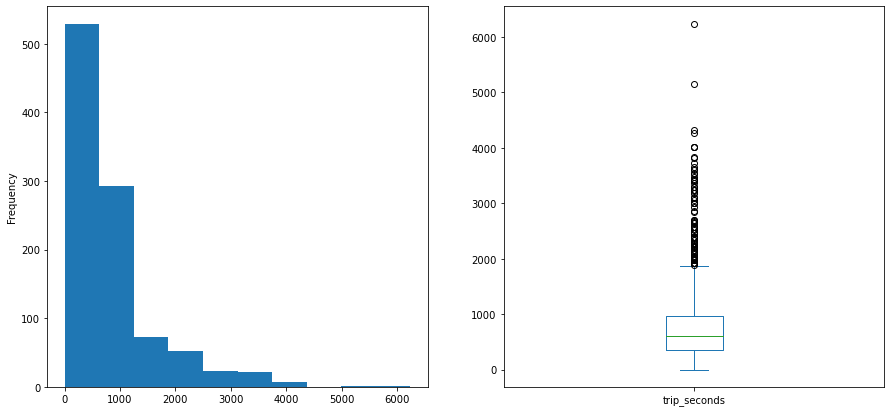

In [5]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 7))
num_df['trip_seconds'].plot(kind='hist', bins=10, ax=ax[0])
num_df['trip_seconds'].plot(kind='box',           ax=ax[1])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


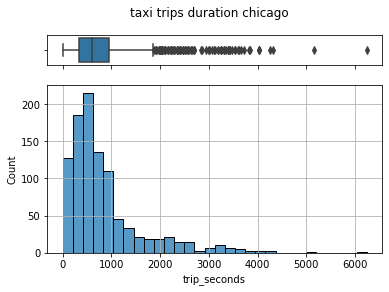

In [6]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
#parte la grafica 15% arriba y 85% abajo

# assigning a graph to each ax
sns.boxplot(num_df["trip_seconds"], ax=ax_box)
sns.histplot(data=num_df, x="trip_seconds", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
#titulo
plt.suptitle('taxi trips duration chicago')  
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-trip-duration-chicago')
f.savefig(plot_path)
#no es un error sino un warning

In [7]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trip_seconds            1000 non-null   Int64  
 1   trip_miles              1000 non-null   float64
 2   pickup_census_tract     0 non-null      Int64  
 3   dropoff_census_tract    0 non-null      Int64  
 4   pickup_community_area   0 non-null      Int64  
 5   dropoff_community_area  0 non-null      Int64  
 6   fare                    1000 non-null   float64
 7   tips                    1000 non-null   float64
 8   tolls                   907 non-null    float64
 9   extras                  1000 non-null   float64
 10  trip_total              1000 non-null   float64
 11  pickup_latitude         0 non-null      float64
 12  pickup_longitude        0 non-null      float64
 13  dropoff_latitude        0 non-null      float64
 14  dropoff_longitude       0 non-null      f

In [8]:
# se borraron columnas con datos en blanco
num_df = num_df.drop(['pickup_census_tract','dropoff_census_tract','pickup_community_area','dropoff_community_area','pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude'], axis=1)
num_df.head()

,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total
0,600,0.8,6.75,2.00,0.0,0.0,9.25
1,960,7.6,21.50,0.00,0.0,0.0,21.50
2,3000,13.2,37.00,0.00,0.0,0.0,37.00
3,2220,12.2,35.50,6.08,0.0,4.5,46.58
4,1560,15.6,39.25,8.65,0.0,4.0,52.40


In [9]:
columns = ['trip_seconds','trip_miles','fare','tips','tolls','extras','trip_total']

1. Exercico hacer las mismas graficas para el resto de variables numericas

In [10]:
#def graficas (col):
    
    #f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    #sns.boxplot(num_df[columns], ax=ax_box)
    #sns.histplot(data=num_df, x=columns, bins=30, ax=ax_hist)
    
    #plt.suptitle(columns)  
    #ax_hist.grid()
    #plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


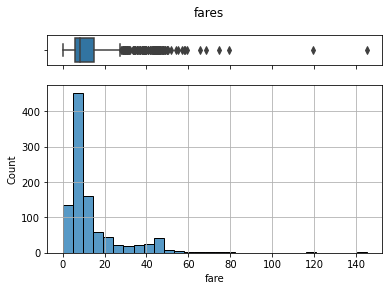

In [11]:
#Gradfica uno fare
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(num_df["fare"], ax=ax_box)
sns.histplot(data=num_df, x="fare", bins=30, ax=ax_hist)
ax_box.set(xlabel='')
plt.suptitle('fares')  
ax_hist.grid()

plot_path = os.path.join(project_dir, 'reports', 'plots', 'fare')
f.savefig(plot_path)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


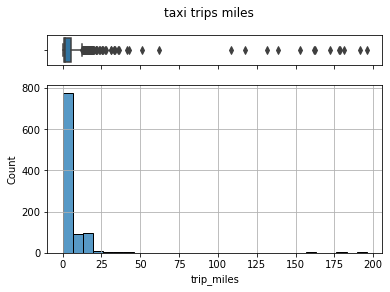

In [12]:
#Gradfica dos taxi trips miles
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(num_df["trip_miles"], ax=ax_box)
sns.histplot(data=num_df, x="trip_miles", bins=30, ax=ax_hist)
ax_box.set(xlabel='')
plt.suptitle('taxi trips miles')  
ax_hist.grid()

plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi trips miles')
f.savefig(plot_path)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


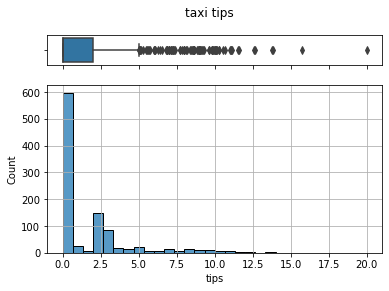

In [13]:
#Gradfica tres tips
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(num_df["tips"], ax=ax_box)
sns.histplot(data=num_df, x="tips", bins=30, ax=ax_hist)
ax_box.set(xlabel='')
plt.suptitle('taxi tips')  
ax_hist.grid()

plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi tips')
f.savefig(plot_path)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


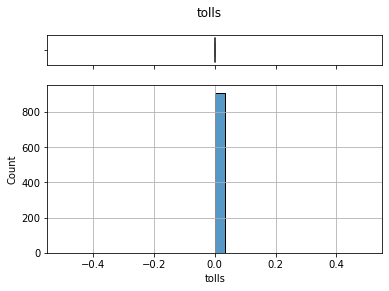

In [14]:
#Gradfica cuatro tolls
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(num_df["tolls"], ax=ax_box)
sns.histplot(data=num_df, x="tolls", bins=30, ax=ax_hist)
ax_box.set(xlabel='')
plt.suptitle('tolls')  
ax_hist.grid()

plot_path = os.path.join(project_dir, 'reports', 'plots', 'tolls')
f.savefig(plot_path)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


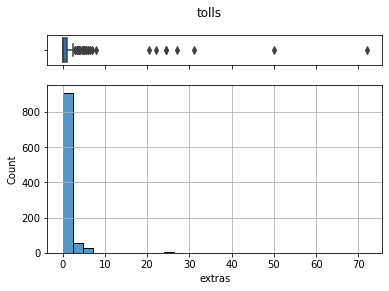

In [15]:
#Gradfica cinco extras
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(num_df["extras"], ax=ax_box)
sns.histplot(data=num_df, x="extras", bins=30, ax=ax_hist)
ax_box.set(xlabel='')
plt.suptitle('tolls')  
ax_hist.grid()

plot_path = os.path.join(project_dir, 'reports', 'plots', 'extras')
f.savefig(plot_path)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


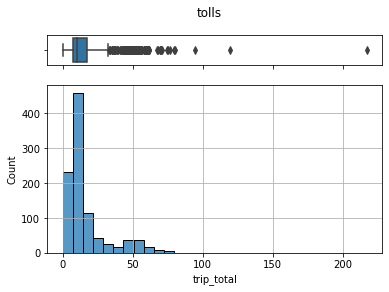

In [16]:
#Gradfica seis trip_total
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(num_df["trip_total"], ax=ax_box)
sns.histplot(data=num_df, x="trip_total", bins=30, ax=ax_hist)
ax_box.set(xlabel='')
plt.suptitle('tolls')  
ax_hist.grid()

plot_path = os.path.join(project_dir, 'reports', 'plots', 'trip_total')
f.savefig(plot_path)

LOG TRANSFORM

In [17]:
x = num_df['trip_seconds']
x

0       600
1       960
2      3000
3      2220
4      1560
       ... 
995    2040
996     480
997    1260
998     720
999     960
Name: trip_seconds, Length: 1000, dtype: Int64

In [18]:
log_x = np.log(x+1)
log_x

0      6.398595
1      6.867974
2      8.006701
3      7.705713
4      7.353082
         ...   
995    7.621195
996    6.175867
997     7.13966
998    6.580639
999    6.867974
Name: trip_seconds, Length: 1000, dtype: Float64

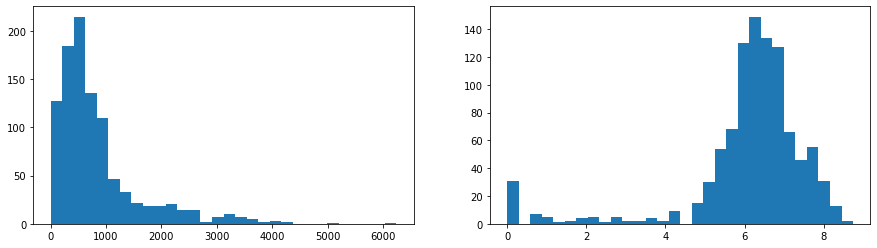

In [19]:
f, ax = plt.subplots(1,2, figsize=(15,4))
ax[0].hist(x,     bins=30)
ax[1].hist(log_x, bins=30); #punto y como para que no muestre los valores

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='trip_seconds'>

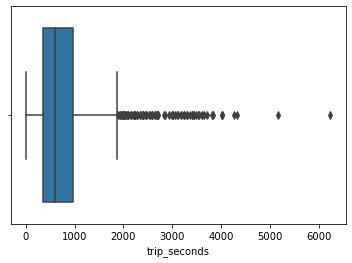

In [20]:
sns.boxplot(x)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='trip_seconds'>

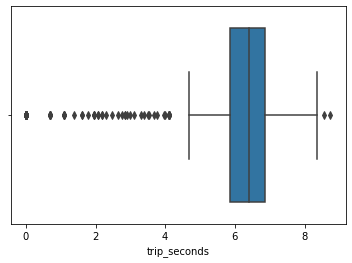

In [21]:
sns.boxplot(log_x)

In [22]:
log_x.describe()

count    1000.000000
mean        6.101627
std         1.595560
min         0.000000
25%         5.853610
50%         6.398595
75%         6.867974
max         8.738896
Name: trip_seconds, dtype: float64

In [23]:
#media
log_x.mean() 

6.101626616629768

In [24]:
#log natural
np.exp(log_x.mean())

446.58359990923947

bidimencional
two dimensions

Scatter plots
correlation

<AxesSubplot:xlabel='trip_seconds', ylabel='trip_miles'>

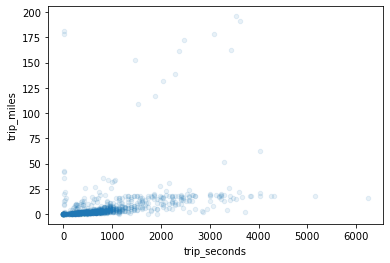

In [25]:
num_df.plot(kind='scatter', x='trip_seconds', y='trip_miles', alpha=0.1)

In [26]:
#coeficiente de correlacion
x='trip_seconds'
y='trip_miles'
num_df[[x, y]].corr()

,trip_seconds,trip_miles
trip_seconds,1.000000,0.388041
trip_miles,0.388041,1.000000


<AxesSubplot:xlabel='trip_seconds', ylabel='trip_miles'>

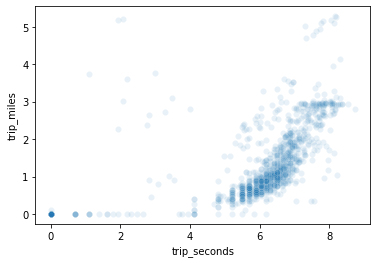

In [27]:
log_x= np.log(num_df[x] + 1)
log_y= np.log(num_df[y] + 1)
sns.scatterplot(x=log_x, y=log_y, alpha=0.1)

In [28]:
#coeficiente de correlacion de logaritmos
log_num_df = pd.DataFrame(
    columns=[x, y]
)

log_num_df[x]=log_x
log_num_df[y]=log_y
log_num_df.corr()

,trip_seconds,trip_miles
trip_seconds,1.000000,0.543457
trip_miles,0.543457,1.000000


2. exercicio hacer el estudio de correlacion con las otras variables

In [29]:
# log de la variable 'trip_miles'
x = num_df['trip_miles']
x

0       0.8
1       7.6
2      13.2
3      12.2
4      15.6
       ... 
995     9.1
996     1.8
997     6.0
998     1.7
999     5.4
Name: trip_miles, Length: 1000, dtype: float64

In [30]:
# log de la variable 'trip_miles'
log_x = np.log(x+1)
log_x

0      0.587787
1      2.151762
2      2.653242
3      2.580217
4      2.809403
         ...   
995    2.312535
996    1.029619
997    1.945910
998    0.993252
999    1.856298
Name: trip_miles, Length: 1000, dtype: float64

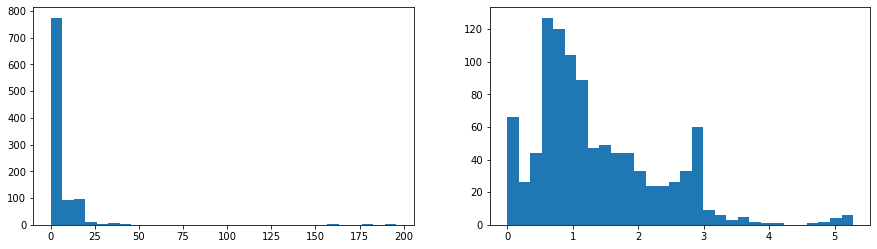

In [31]:
# Graficas de la variable 'trip_miles' normal y con logaritmo
f, ax = plt.subplots(1,2, figsize=(15,4))
ax[0].hist(x,     bins=30)
ax[1].hist(log_x, bins=30);

In [32]:
# log de la variable 'fare'
x = num_df['fare']
x

0       6.75
1      21.50
2      37.00
3      35.50
4      39.25
       ...  
995    26.00
996     8.00
997    19.00
998     9.25
999    16.25
Name: fare, Length: 1000, dtype: float64

In [33]:
# log de la variable 'fare'
log_x = np.log(x+1)
log_x

0      2.047693
1      3.113515
2      3.637586
3      3.597312
4      3.695110
         ...   
995    3.295837
996    2.197225
997    2.995732
998    2.327278
999    2.847812
Name: fare, Length: 1000, dtype: float64

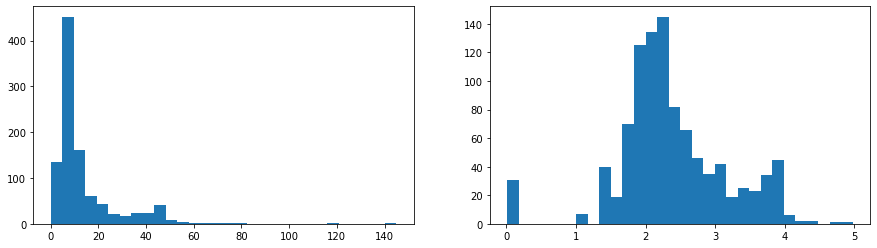

In [34]:
# Graficas de la variable 'fare' normal y con logaritmo
f, ax = plt.subplots(1,2, figsize=(15,4))
ax[0].hist(x,     bins=30)
ax[1].hist(log_x, bins=30);

In [35]:
# log de la variable 'tolls'
x = num_df['tolls']
x

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
995    0.0
996    0.0
997    0.0
998    0.0
999    0.0
Name: tolls, Length: 1000, dtype: float64

In [36]:
# log de la variable 'tolls'
log_x = np.log(x+1)
log_x

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
995    0.0
996    0.0
997    0.0
998    0.0
999    0.0
Name: tolls, Length: 1000, dtype: float64

In [37]:
# log de la variable 'tips'
x = num_df['tips']
x

0      2.00
1      0.00
2      0.00
3      6.08
4      8.65
       ... 
995    0.00
996    0.00
997    3.80
998    0.00
999    0.00
Name: tips, Length: 1000, dtype: float64

In [38]:
# log de la variable 'tips'
log_x = np.log(x+1)
log_x

0      1.098612
1      0.000000
2      0.000000
3      1.957274
4      2.266958
         ...   
995    0.000000
996    0.000000
997    1.568616
998    0.000000
999    0.000000
Name: tips, Length: 1000, dtype: float64

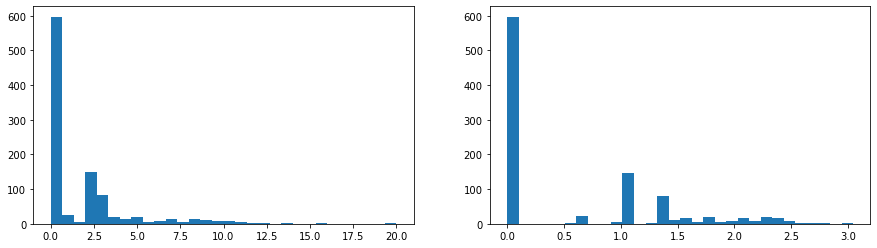

In [39]:
# Graficas de la variable 'tips' normal y con logaritmo
f, ax = plt.subplots(1,2, figsize=(15,4))
ax[0].hist(x,     bins=30)
ax[1].hist(log_x, bins=30);

In [40]:
# log de la variable 'extras'
x = num_df['extras']
x

0      0.0
1      0.0
2      0.0
3      4.5
4      4.0
      ... 
995    0.0
996    1.5
997    0.0
998    0.0
999    0.0
Name: extras, Length: 1000, dtype: float64

In [41]:
# log de la variable 'extras'
log_x = np.log(x+1)
log_x

0      0.000000
1      0.000000
2      0.000000
3      1.704748
4      1.609438
         ...   
995    0.000000
996    0.916291
997    0.000000
998    0.000000
999    0.000000
Name: extras, Length: 1000, dtype: float64

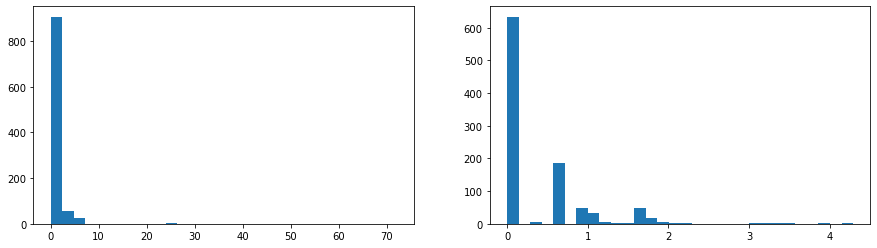

In [42]:
# Graficas de la variable 'extras' normal y con logaritmo
f, ax = plt.subplots(1,2, figsize=(15,4))
ax[0].hist(x,     bins=30)
ax[1].hist(log_x, bins=30);

In [43]:
# log de la variable 'trip_total'
log_x = np.log(x+1)
log_x

0      0.000000
1      0.000000
2      0.000000
3      1.704748
4      1.609438
         ...   
995    0.000000
996    0.916291
997    0.000000
998    0.000000
999    0.000000
Name: extras, Length: 1000, dtype: float64

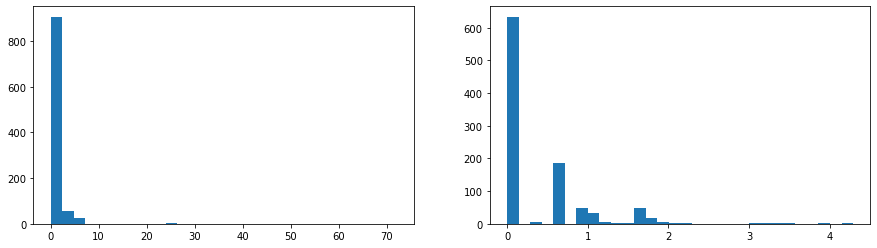

In [44]:
# Graficas de la variable 'trip_total' normal y con logaritmo
f, ax = plt.subplots(1,2, figsize=(15,4))
ax[0].hist(x,     bins=30)
ax[1].hist(log_x, bins=30);

matrices de dispercion

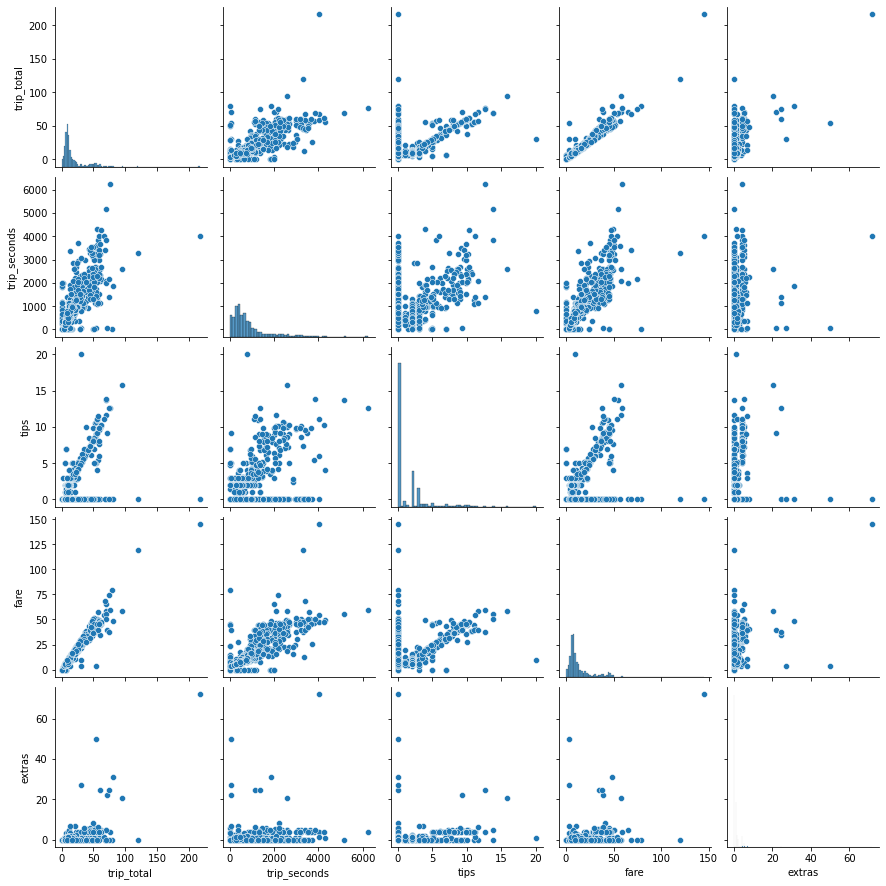

In [45]:
cols = ['trip_total', 'trip_seconds', 'tips', 'fare', 'extras']
sns.pairplot(data=num_df[cols])   

<AxesSubplot:>

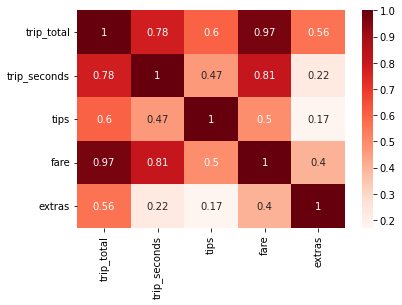

In [46]:
correlations = num_df[cols].corr()
sns.heatmap(correlations, cmap='Reds', annot=True)

3. Construir mapa de calor  y ScatterMatrix, con las variables numéricas transformadas a logaritmo

In [51]:
# log de la variable 'trip_miles'
x1 = num_df['trip_miles']
trip_miles_log = np.log(x1+1)
# log de la variable 'trip_total'
x2 = num_df['trip_total']
trip_total_log = np.log(x2+1)
# log de la variable 'fare'
x3 = num_df['fare']
fare_log = np.log(x3+1)
# log de la variable 'tips'
x4 = num_df['tips']
tips_log = np.log(x4+1)
# log de la variable 'tolls'
x5 = num_df['tolls']
tolls_log = np.log(x5+1)
# log de la variable 'extras'
x6 = num_df['extras']
extras_log = np.log(x6+1)
# log de la variable 'trip_miles'
x7 = num_df['trip_total']
trip_total_log = np.log(x7+1)

min y max scaled

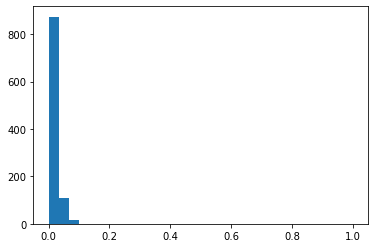

In [65]:
x = num_df['trip_seconds']
x_min = x.min()
x_max = x.max()

x_scaled = (x-x_min) / (x_max-x_min)
plt.hist(x_scaled, bins=30);

standard scaler

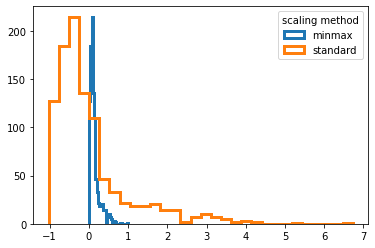

In [48]:
x = num_df['trip_seconds']
x_min = x.min()
x_max = x.max()

x_mean = x.mean()
x_std = x.std()

x_minmax_scaler = (x - x_min) / (x_max-x_min)
x_std_scaler = (x-x_mean)/x_std

plt.hist(x_minmax_scaler, bins=30, label='minmax', histtype='step', lw=3)
plt.hist(x_std_scaler, bins=30, label='standard', histtype='step', lw=3);

plt.legend(title='scaling method')

In [ ]:
4. Estudio de correlaciones con Standard Scaler y MinMax Scaler

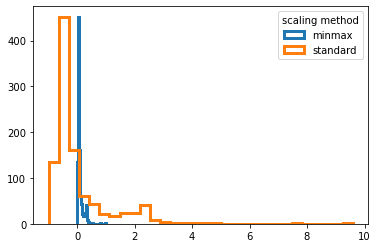

In [53]:
# Standard Scaler y MinMax Scaler fare
x = num_df['fare']
x_min = x.min()
x_max = x.max()

x_mean = x.mean()
x_std = x.std()

x_minmax_scaler = (x - x_min) / (x_max-x_min)
x_std_scaler = (x-x_mean)/x_std

plt.hist(x_minmax_scaler, bins=30, label='minmax', histtype='step', lw=3)
plt.hist(x_std_scaler, bins=30, label='standard', histtype='step', lw=3);

plt.legend(title='scaling method')

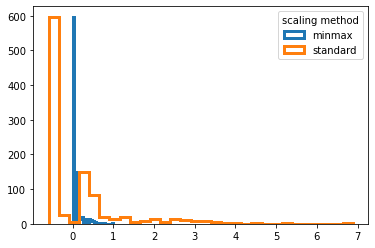

In [54]:
# Standard Scaler y MinMax Scaler tips
x = num_df['tips']
x_min = x.min()
x_max = x.max()

x_mean = x.mean()
x_std = x.std()

x_minmax_scaler = (x - x_min) / (x_max-x_min)
x_std_scaler = (x-x_mean)/x_std

plt.hist(x_minmax_scaler, bins=30, label='minmax', histtype='step', lw=3)
plt.hist(x_std_scaler, bins=30, label='standard', histtype='step', lw=3);

plt.legend(title='scaling method')

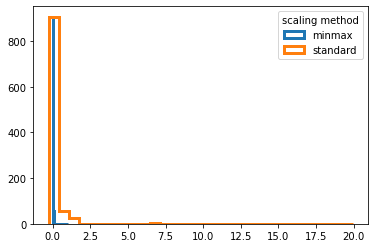

In [62]:
# Standard Scaler y MinMax Scaler tolls
x = num_df['extras']
x_min = x.min()
x_max = x.max()

x_mean = x.mean()
x_std = x.std()

x_minmax_scaler = (x - x_min) / (x_max-x_min)
x_std_scaler = (x-x_mean)/x_std

plt.hist(x_minmax_scaler, bins=30, label='minmax', histtype='step', lw=3)
plt.hist(x_std_scaler, bins=30, label='standard', histtype='step', lw=3);

plt.legend(title='scaling method')

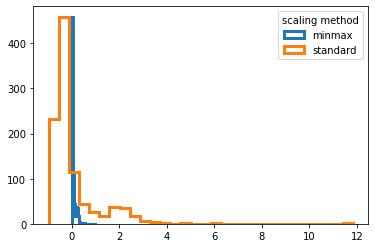

In [63]:
# Standard Scaler y MinMax Scaler tolls
x = num_df['trip_total']
x_min = x.min()
x_max = x.max()

x_mean = x.mean()
x_std = x.std()

x_minmax_scaler = (x - x_min) / (x_max-x_min)
x_std_scaler = (x-x_mean)/x_std

plt.hist(x_minmax_scaler, bins=30, label='minmax', histtype='step', lw=3)
plt.hist(x_std_scaler, bins=30, label='standard', histtype='step', lw=3);

plt.legend(title='scaling method')

In [ ]:
x = num_df['trip_miles']
x_min = x.min()
x_max = x.max()

x_mean = x.mean()
x_std = x.std()

x_minmax_scaler = (x - x_min) / (x_max-x_min)
x_std_scaler = (x-x_mean)/x_std

plt.hist(x_minmax_scaler, bins=30, label='minmax', histtype='step', lw=3)
plt.hist(x_std_scaler, bins=30, label='standard', histtype='step', lw=3);

plt.legend(title='scaling method')

In [49]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [50]:
minmax_scaler= MinMaxScaler().fit(num_df[cols])
data_min_max_scaled= minmax_scaler.transform(num_df[cols])
data_min_max_scaled

array([[0.04258261, 0.09615385, 0.1       , 0.04648596, 0.        ],
       [0.09903682, 0.15384615, 0.        , 0.14821712, 0.        ],
       [0.17046869, 0.48076923, 0.        , 0.25512104, 0.        ],
       ...,
       [0.10733214, 0.20192308, 0.19      , 0.13097455, 0.        ],
       [0.04258261, 0.11538462, 0.        , 0.06372853, 0.        ],
       [0.07484216, 0.15384615, 0.        , 0.11200772, 0.        ]])

exercicio de correlaciones con standard scaler